In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from matplotlib import pyplot as plt
from pprint import pprint
from matplotlib import style
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import seaborn as sns
import sys
import math 
import random as rd
from sklearn.model_selection import KFold

In [2]:
data=pd.read_csv('data_reduced.csv')

In [3]:
pd.set_option('max_rows', 400)
pd.set_option('max_columns', 400)

In [4]:
corrdata=data.corr()

In [5]:
corrdata[corrdata.isnull()]=0

In [6]:
corr=corrdata.values

In [7]:
def sortscore(corrmatrix,indexsort):
    score=0;
    length=len(indexsort);
    len1=corrmatrix.shape[0];
    len2=corrmatrix.shape[1];
    if length!=len1 or length!=len2:
        raise ValueError('Shape of matrix and indexs not fit');
    for i in range(0,length):
        for j in range(0,i):
            #the score function can be tuned
            score+=((corrmatrix[indexsort[i],indexsort[j]]**2)/((i-j)**2))**(1/2);
    return score;

In [8]:
#T is a hyperparameter that can be tuned, by setting T to be smaller, you are more likely to reject the exchange that decreases the score
def diagonise(corrmatrix,randomseed=10,max_iter=100000,T=0.001):
    #set random seed
    rd.seed(randomseed);
    length=corrmatrix.shape[0];
    #check the format of the matrix
    if length!=corrmatrix.shape[1]:
        raise ValueError('matrix is not square');
    originindex=list(range(length));
    index=originindex;
    score=sortscore(corr,originindex);
    scoreevolve=[];
    for itercount in range(max_iter):
        choice=rd.choices(originindex,k=2);
        #try an indice exchange and calculate the score
        index[choice[0]],index[choice[1]]=index[choice[1]],index[choice[0]];
        tryscore=sortscore(corr,index);
        #if score decreases then generate a random number to decide whether to accept the change or reject it by some posibbility
        #if reject, then change the indices back
        if tryscore<score and rd.random()>math.exp((tryscore-score)/T):
            index[choice[0]],index[choice[1]]=index[choice[1]],index[choice[0]];
        else:
            #if accept, then keep the change and refresh the score
            score=tryscore;
        #scoreevolve stores the score evolution during the iteration
        if itercount%1000==0:
            scoreevolve.append(score);
        #index is the final result of swapped indices
    return score,index,scoreevolve;

In [9]:
score, sortedindex,scoreevolve=diagonise(corr,randomseed=100,max_iter=100000,T=0.001)

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


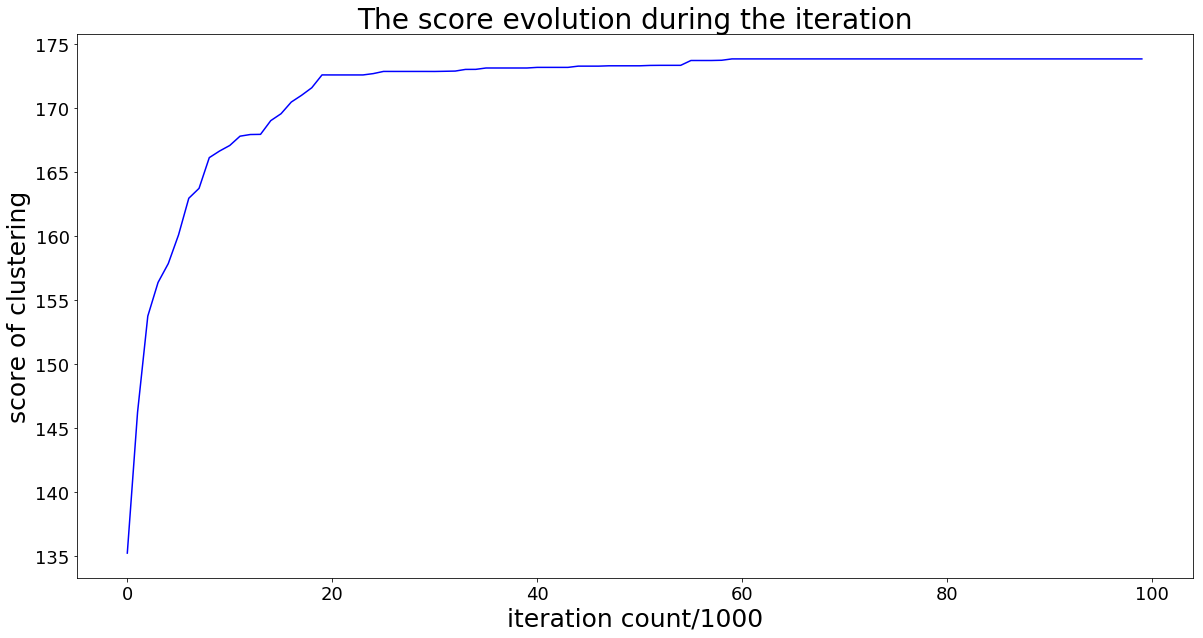

In [10]:
fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.add_subplot(111) 
ax1.set_title('The score evolution during the iteration',size=28)
ax1.tick_params(labelsize=18)
ax1.set_xlabel('iteration count/1000',fontsize=25)
ax1.set_ylabel('score of clustering',fontsize=25)
ax1.plot(scoreevolve,color='blue')
fig1.show()

In [11]:
fig1.savefig('scoreevo.pdf', format='pdf', dpi=1000)

In [12]:
newindex=[]
for i in range(corrdata.shape[0]):
    newindex.append(data.columns[sortedindex[i]]);

In [13]:
datasorted=data[newindex]

In [15]:
corrdatasorted=datasorted.corr()
corrdatasorted[corrdatasorted.isnull()]=0

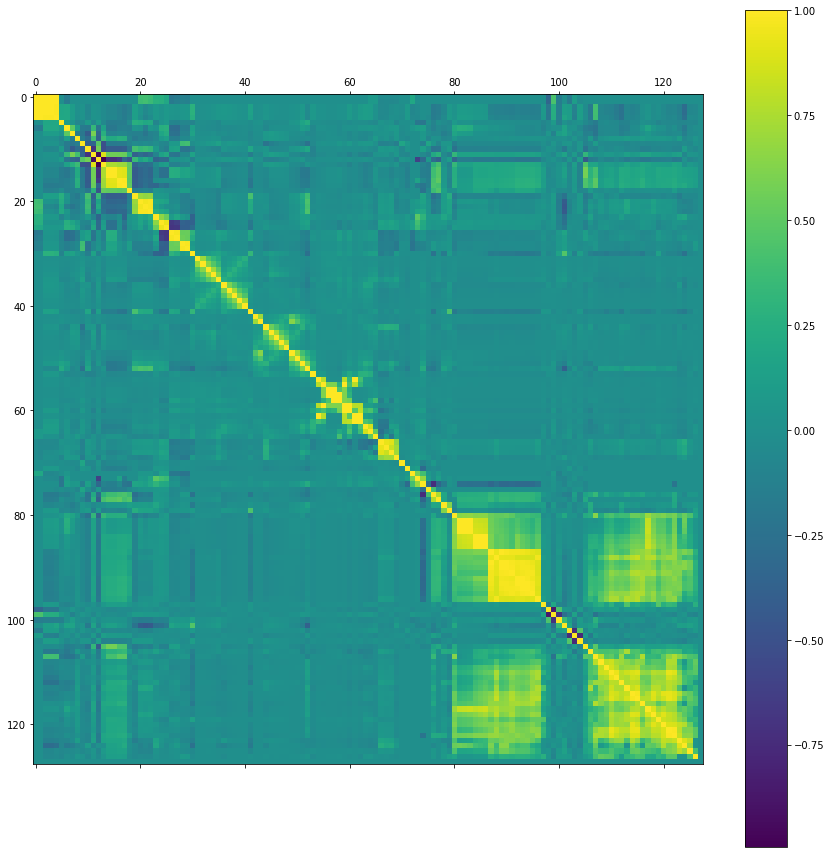

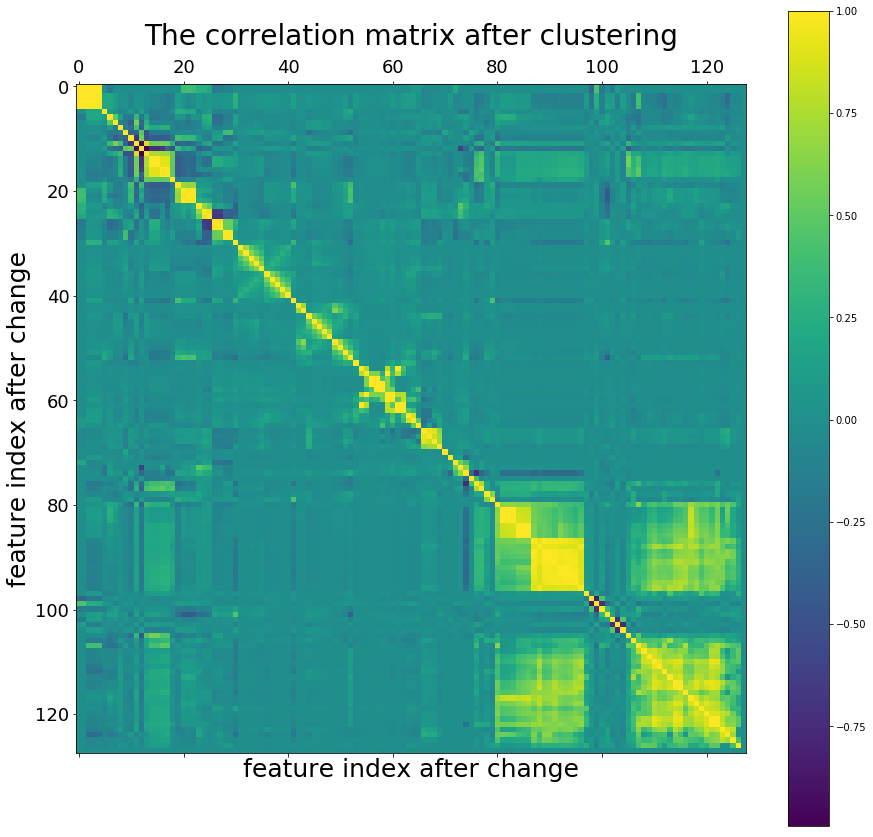

In [29]:
plt.figure(figsize=(15,15))
plt.matshow(corrdatasorted,fignum=1)
plt.colorbar()
fig2 = plt.figure(figsize=(15,15))
ax2 = fig2.add_subplot(111)
ax2.set_title('The correlation matrix after clustering',size=28)
ax2.tick_params(labelsize=18)
ax2.set_xlabel('feature index after change',fontsize=25)
ax2.set_ylabel('feature index after change',fontsize=25)
im=ax2.matshow(corrdatasorted)
fig2.colorbar(im)
plt.show()

In [30]:
fig2.savefig('corrmatrix.pdf', format='pdf', dpi=1000)

In [31]:
indexshape=np.zeros(len(corrdatasorted));
for i in range(len(corrdatasorted)):
    for j in range(i):
        if np.isnan(corrdatasorted.iloc[i][j]):
            w=0;
        else:
            w=(corrdatasorted.iloc[i][j]**2/(i-j)**2)**(1/2);
        indexshape[i]+=w;
        indexshape[j]+=w;

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


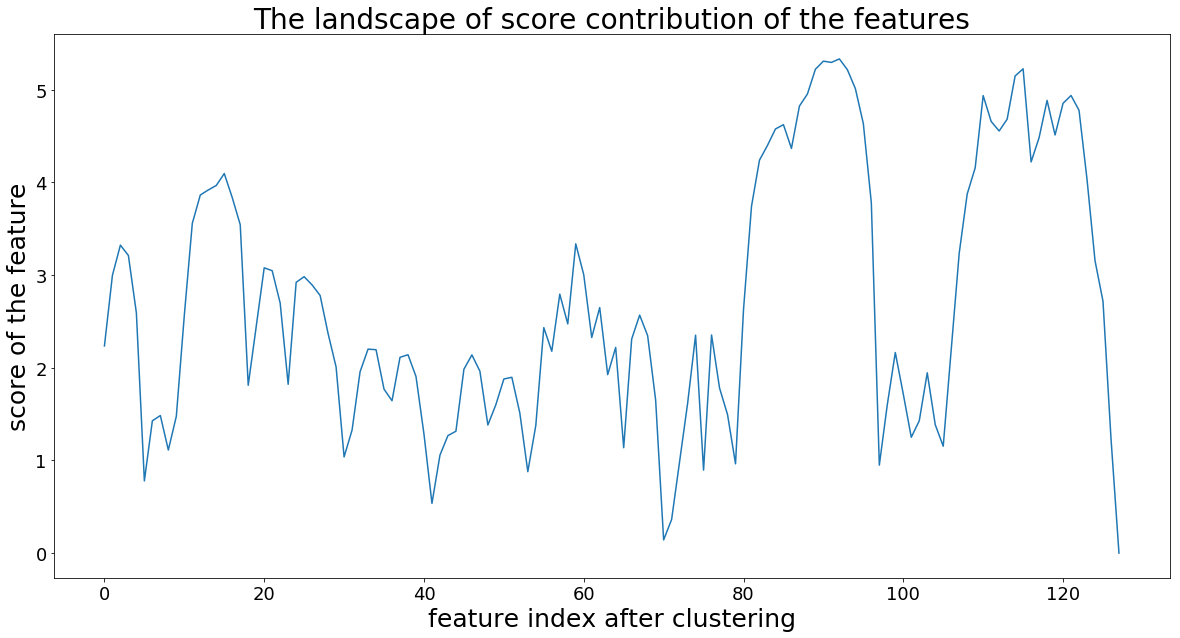

In [33]:
fig3 = plt.figure(figsize=(20,10))
ax3 = fig3.add_subplot(111) 
ax3.set_title('The landscape of score contribution of the features',size=28)
ax3.tick_params(labelsize=18)
ax3.set_xlabel('feature index after clustering',fontsize=25)
ax3.set_ylabel('score of the feature',fontsize=25)
ax3.plot(indexshape);
fig3.show()

In [34]:
fig3.savefig('featurelandscape.pdf', format='pdf', dpi=1000)